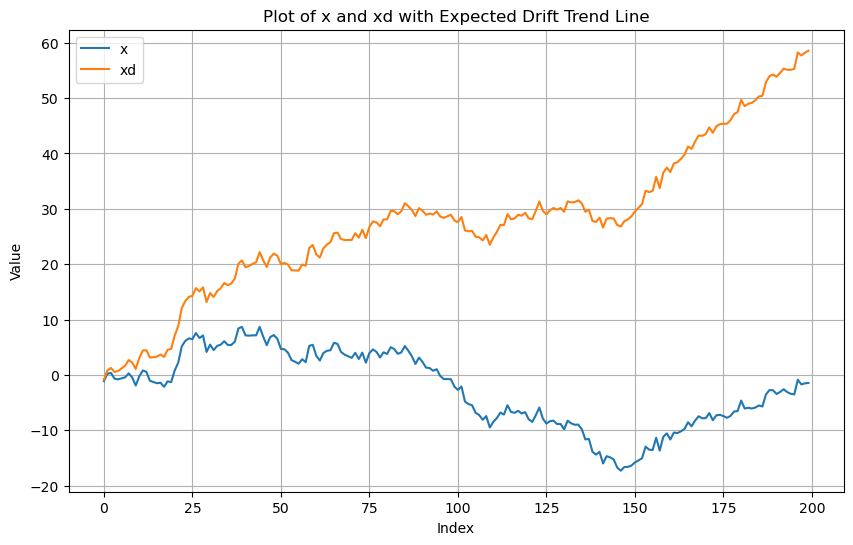

In [1]:
import numpy as np
import matplotlib.pyplot as plt

w = np.random.normal(loc=0, scale=1, size=200)
x = np.cumsum(w)
wd = w + 0.3
xd = np.cumsum(wd)

plt.figure(figsize=(10, 6))
plt.plot(x, label='x')
plt.plot(xd, label='xd')


plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of x and xd with Expected Drift Trend Line')
plt.grid(True)
plt.show()


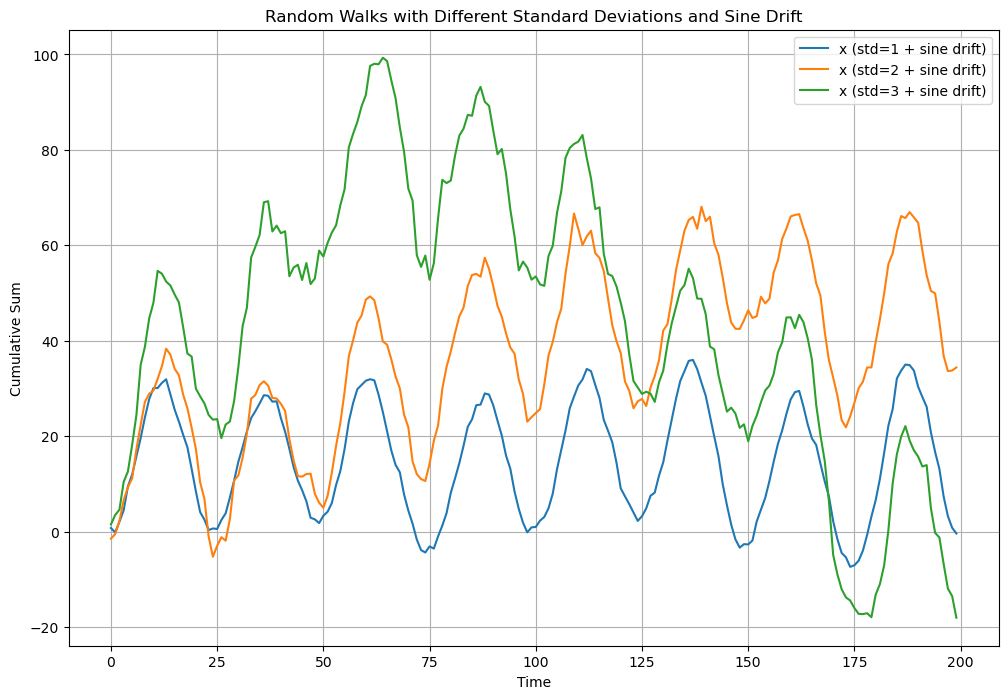

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_walk_with_sine_drift(std, t):
    w = np.random.normal(loc=0, scale=std, size=len(t))
    sine_drift = 4 * np.sin(2 * np.pi * t / 25)
    wd = w + sine_drift
    return np.cumsum(wd)

t = np.arange(200)  # Time points

# Generate random walks with sine drift for each std deviation
x1 = generate_random_walk_with_sine_drift(1, t)
x2 = generate_random_walk_with_sine_drift(2, t)
x3 = generate_random_walk_with_sine_drift(3, t)

plt.figure(figsize=(12, 8))
plt.plot(x1, label='x (std=1 + sine drift)')
plt.plot(x2, label='x (std=2 + sine drift)')
plt.plot(x3, label='x (std=3 + sine drift)')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Sum')
plt.title('Random Walks with Different Standard Deviations and Sine Drift')
plt.grid(True)
plt.show()


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *

/opt/anaconda3/lib/python3.13/site-packages/astsadata/astsadata.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  birth = pd.read_csv(f"{path}/data/birth.csv", index_col=0, parse_dates=True)
/opt/anaconda3/lib/python3.13/site-packages/astsadata/astsadata.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cardox = pd.read_csv(f"{path}/data/cardox.csv", index_col=0, parse_dates=True)
/opt/anaconda3/lib/python3.13/site-packages/astsadata/astsadata.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chicken = pd.read_csv(f"{path}/data/chicken.csv", index_col=0, parse_date

Coefficient of determination (R^2): 0.5706221962094157
Intercept: 3.634936873241468
Slope: [0.02107488]


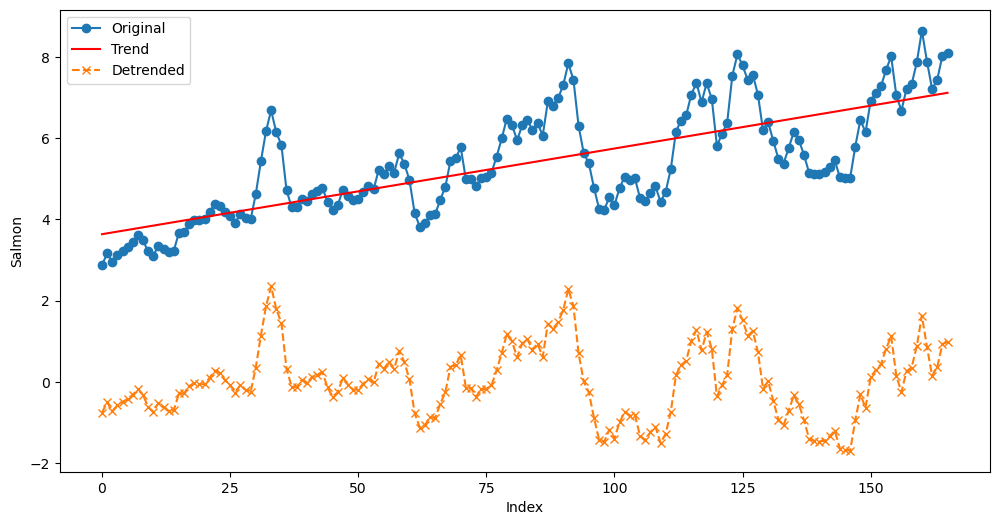

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Add numeric index to use as predictor for regression
salmon['index_num'] = range(len(salmon))
x = salmon['index_num'].values.reshape(-1, 1)
y = salmon['value'].values

# Fit linear regression
model = LinearRegression().fit(x, y)
print("Coefficient of determination (R^2):", model.score(x, y))
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

# Calculate trend using the model
trend = model.predict(x)

# Detrend by subtracting the trend from original values
salmon['detrended'] = y - trend

# Plot original and detrended
plt.figure(figsize=(12, 6))
plt.plot(salmon['index_num'], y, marker='o', label='Original')
plt.plot(salmon['index_num'], trend, color='red', label='Trend')
plt.plot(salmon['index_num'], salmon['detrended'], marker='x', linestyle='--', label='Detrended')
plt.xlabel('Index')
plt.ylabel('Salmon')
plt.legend()
plt.show()


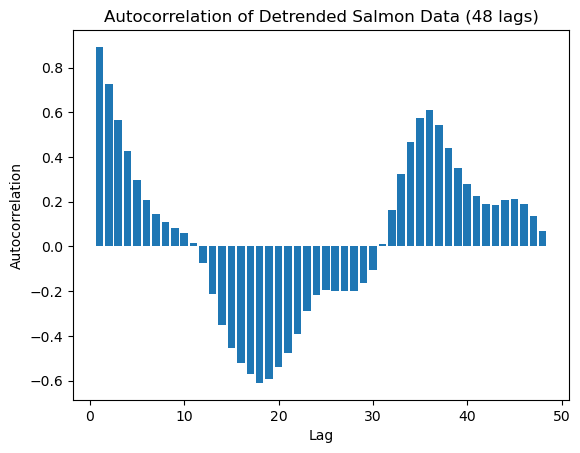

In [16]:
import matplotlib.pyplot as plt

# Calculate autocorrelations for lags 1 to 48
autocorrelations = [salmon['detrended'].autocorr(lag=lag) for lag in range(1, 49)]

# Plot autocorrelation function (ACF)
plt.bar(range(1, 49), autocorrelations)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Detrended Salmon Data (48 lags)')
plt.show()


Coefficient of determination (R^2): 0.5706221962094157
Intercept: 3.634936873241468
Slope: [0.02107488]


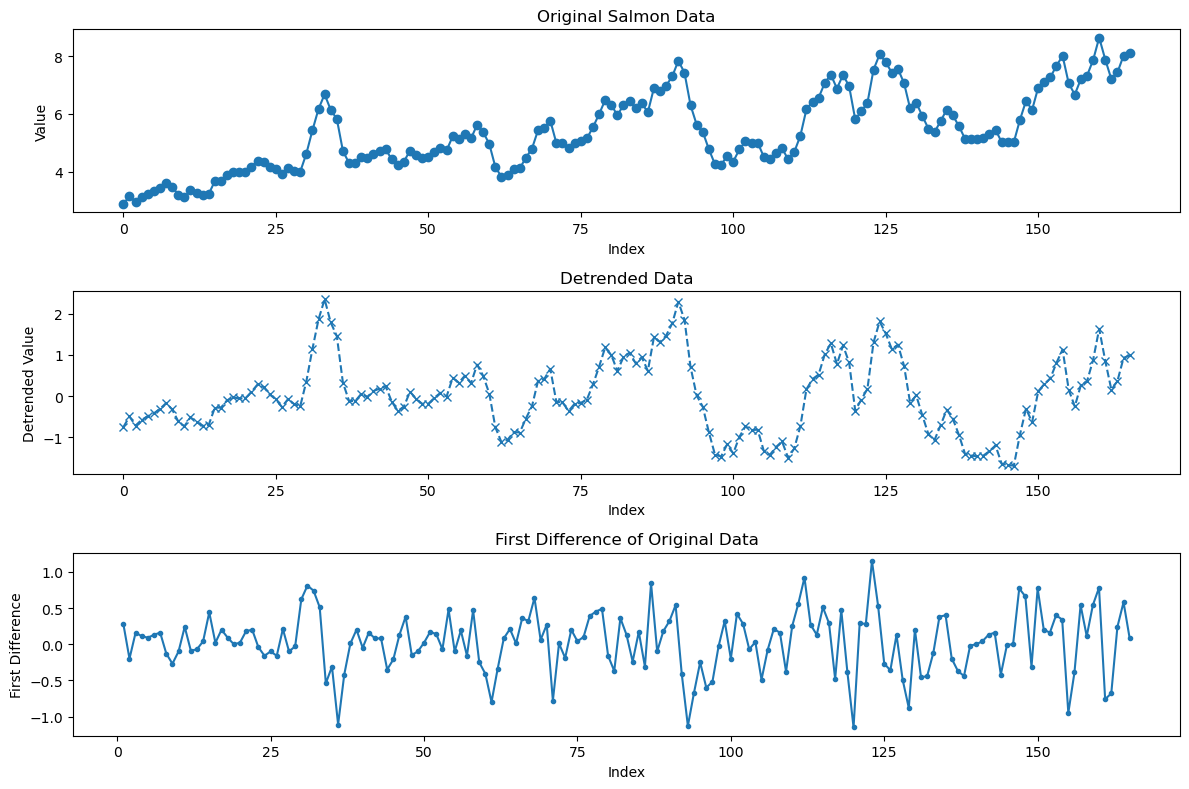

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Add numeric index for regression
salmon['index_num'] = range(len(salmon))
x = salmon['index_num'].values.reshape(-1, 1)
y = salmon['value'].values

# Fit linear regression
model = LinearRegression().fit(x, y)
print("Coefficient of determination (R^2):", model.score(x, y))
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

# Calculate trend using the model
trend = model.predict(x)

# Detrend by subtracting the trend
salmon['detrended'] = y - trend

# Calculate first difference on original data
salmon['first_diff'] = salmon['value'].diff()

# Plot original, detrended, and first differenced data
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(salmon['index_num'], y, marker='o')
plt.title('Original Salmon Data')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(3, 1, 2)
plt.plot(salmon['index_num'], salmon['detrended'], marker='x', linestyle='--')
plt.title('Detrended Data')
plt.xlabel('Index')
plt.ylabel('Detrended Value')

plt.subplot(3, 1, 3)
plt.plot(salmon['index_num'], salmon['first_diff'], marker='.', linestyle='-')
plt.title('First Difference of Original Data')
plt.xlabel('Index')
plt.ylabel('First Difference')

plt.tight_layout()
plt.show()


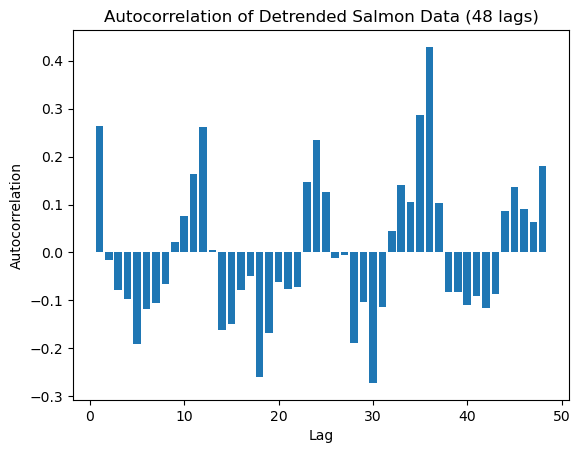

In [18]:
import matplotlib.pyplot as plt

# Calculate autocorrelations for lags 1 to 48
autocorrelations = [salmon['first_diff'].autocorr(lag=lag) for lag in range(1, 49)]

# Plot autocorrelation function (ACF)
plt.bar(range(1, 49), autocorrelations)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Detrended Salmon Data (48 lags)')
plt.show()


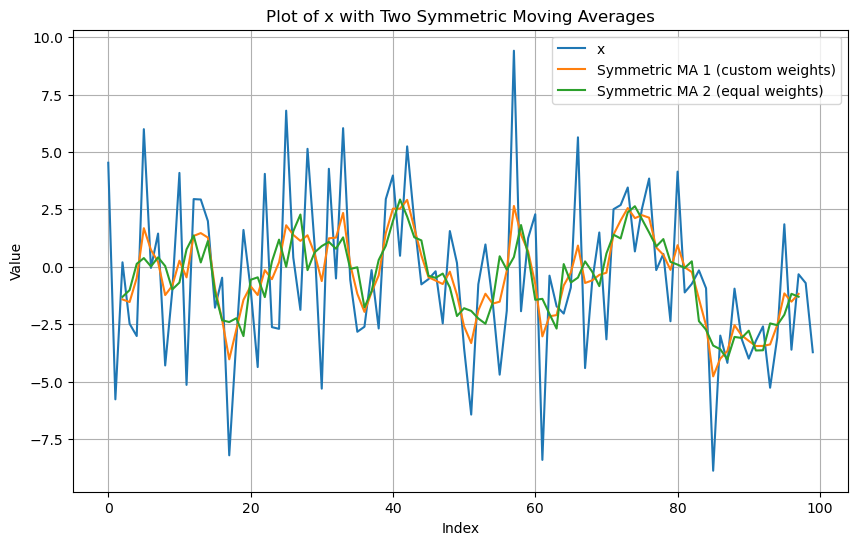

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
w = np.random.normal(loc=0, scale=4, size=100)
#x = np.cumsum(w)
x = w

# Define symmetric weights
weights_sm1 = np.array([1/10, 1/5, 2/5, 1/5, 1/10])
weights_sm2 = np.array([1/5] * 5)

# Calculate symmetric moving averages using convolution
sm1 = np.convolve(x, weights_sm1, mode='valid')
sm2 = np.convolve(x, weights_sm2, mode='valid')

# Plot original series and the two symmetric moving averages
plt.figure(figsize=(10, 6))
plt.plot(x, label='x')
plt.plot(np.arange(2, len(x)-2), sm1, label='Symmetric MA 1 (custom weights)')
plt.plot(np.arange(2, len(x)-2), sm2, label='Symmetric MA 2 (equal weights)')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of x with Two Symmetric Moving Averages')
plt.grid(True)
plt.show()


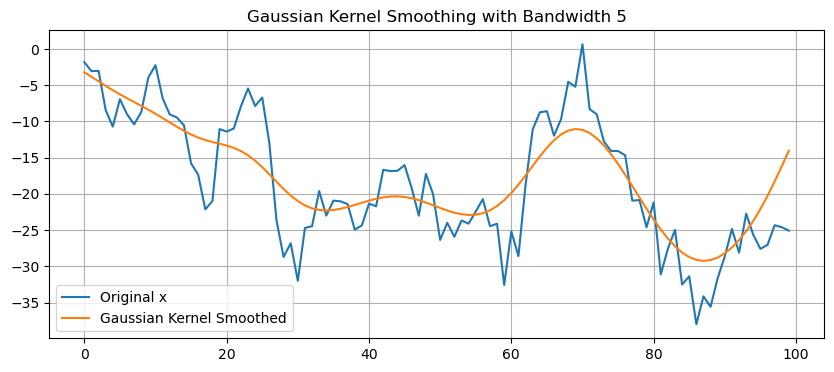

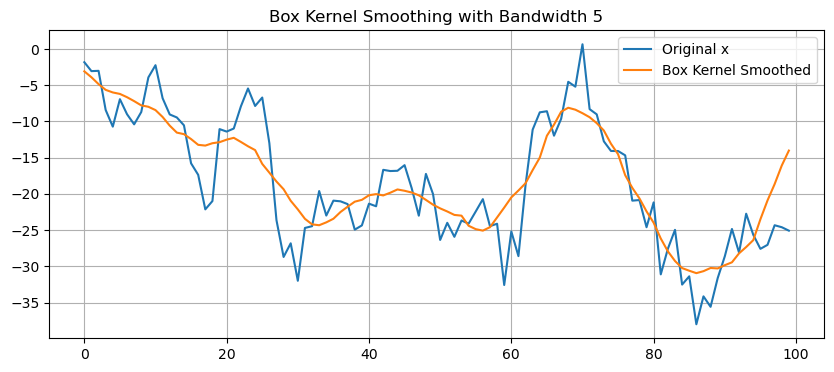

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Generate sample data
w = np.random.normal(loc=0, scale=4, size=100)
x = np.cumsum(w)

# Bandwidth for kernels
bandwidth = 5

# Gaussian kernel (normal) with bandwidth (standard deviation)
def gaussian_kernel(bw):
    size = bw * 6  # cover +-3 sigma roughly
    x_vals = np.arange(-size // 2, size // 2 + 1)
    kernel = np.exp(-(x_vals**2) / (2 * (bw**2)))
    return kernel / kernel.sum()

# Box kernel (uniform) with bandwidth
def box_kernel(bw):
    size = bw * 2 + 1
    kernel = np.ones(size)
    return kernel / kernel.sum()

# Create kernels
g_kernel = gaussian_kernel(bandwidth)
b_kernel = box_kernel(bandwidth)

# Smooth the series with convolution
smooth_gaussian = convolve(x, g_kernel, mode='same')
smooth_box = convolve(x, b_kernel, mode='same')

# Plot the Gaussian smoothed series
plt.figure(figsize=(10, 4))
plt.plot(x, label='Original x')
plt.plot(smooth_gaussian, label='Gaussian Kernel Smoothed')
plt.legend()
plt.title('Gaussian Kernel Smoothing with Bandwidth 5')
plt.grid(True)
plt.show()

# Plot the Box kernel smoothed series
plt.figure(figsize=(10, 4))
plt.plot(x, label='Original x')
plt.plot(smooth_box, label='Box Kernel Smoothed')
plt.legend()
plt.title('Box Kernel Smoothing with Bandwidth 5')
plt.grid(True)
plt.show()
